In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [3]:
flowerdata=pd.read_csv("iris.csv")

In [4]:
flowerdata

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
flowerdata.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
flowerdata.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
flowerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
flowerdata.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [12]:
flowerdata.shape

(150, 5)

In [15]:
flowerdata.iloc[60:100]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor
61,5.9,3.0,4.2,1.5,versicolor
62,6.0,2.2,4.0,1.0,versicolor
63,6.1,2.9,4.7,1.4,versicolor
64,5.6,2.9,3.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
66,5.6,3.0,4.5,1.5,versicolor
67,5.8,2.7,4.1,1.0,versicolor
68,6.2,2.2,4.5,1.5,versicolor
69,5.6,2.5,3.9,1.1,versicolor


In [16]:
flowerdata.replace({'species':{'setosa':0,'versicolor':1,'virginica':2,}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10032\2458394412.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flowerdata.replace({'species':{'setosa':0,'versicolor':1,'virginica':2,}},inplace=True)


In [17]:
flowerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [21]:
correlation=flowerdata.corr()
correlation

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

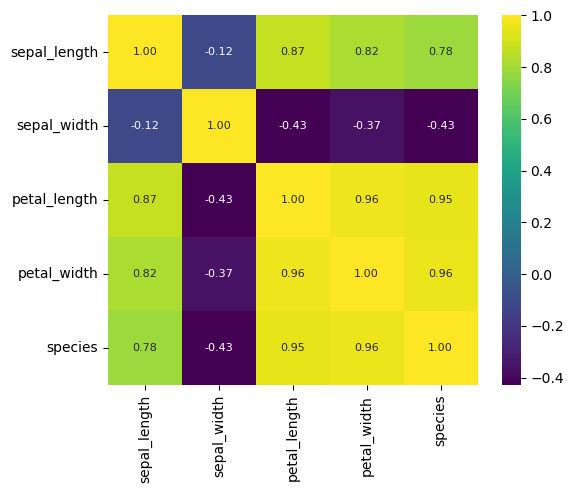

In [22]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='viridis')

In [23]:
flowerdata['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [31]:
x=flowerdata.drop('species',axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
y=flowerdata['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [37]:
model=DecisionTreeClassifier()

In [39]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
train_data_predict = model.predict(x_train)
train_data_accuracy = accuracy_score(train_data_predict,y_train)
print('Accuracy of training data',train_data_accuracy)

Accuracy of training data 1.0


In [41]:
test_data_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(test_data_predict,y_test)
print('Accuracy of testing data',test_data_accuracy)

Accuracy of testing data 1.0


In [42]:
cm= confusion_matrix(test_data_predict,y_test)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

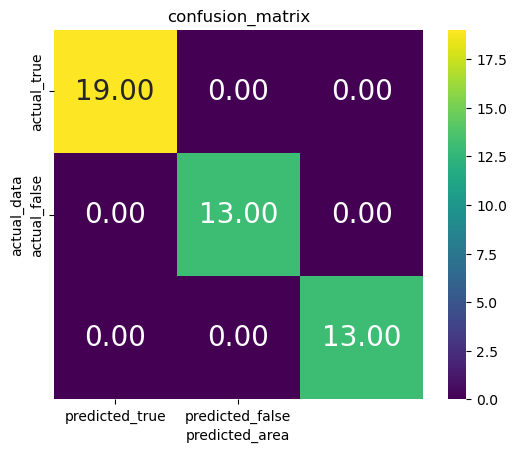

In [43]:
sns.heatmap(cm,annot=True,annot_kws= {'size':20},fmt='.2f',cmap ='viridis',square = True,
            xticklabels=['predicted_true','predicted_false'],
            yticklabels=['actual_true','actual_false'])
plt.xlabel('predicted_area')
plt.ylabel('actual_data')
plt.title('confusion_matrix')
plt.show()

In [44]:
print(classification_report(test_data_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [47]:
new_data = (4.6,	3.1	,1.5,	0.2	)
new_data_as_np = np.asarray(new_data)
new_data_reshaped = new_data_as_np.reshape(1,-1)
prediction = model.predict(new_data_reshaped)
if prediction[0]==0:
    print('The flower is setosa ')
elif prediction[0]==1:
    print('The flower is versicolor ')
else:
    print('The flower is virginica')

The flower is setosa 


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
